In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG

## Visualizing The 3-Layer XOR Neural Network

In `01-xor.py`, we visualized the 3-layer XOR neural network like @fig-xor:

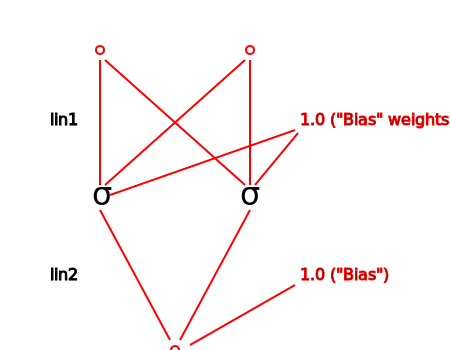

In [ ]:
#| label: fig-xor
#| fig-cap: "A fully-connected (linear) 3-layer network for XOR"


SVG('<svg xmlns="http://www.w3.org/2000/svg" version="1.1" width="450" height="350"> \
  <circle cx="100" cy="50" r="4" stroke="red" stroke-width="2" fill="none" />\
  <circle cx="250" cy="50" r="4" stroke="red" stroke-width="2" fill="none" />\
  <text x="92" y="205" font-size="24pt">σ</text>\
  <text x="240" y="205" font-size="24pt">σ</text>\
  <circle cx="175" cy="350" r="4" stroke="red" stroke-width="2" fill="none" />\
  <text x="300" y="125" stroke="red">1.0 ("Bias" weights)</text> \
  <line x1="295" y1="130" x2 = "110" y2 = "195" stroke="red" stroke-width = "2"/> \
  <line x1="298" y1="133" x2 = "255" y2 = "185" stroke="red" stroke-width = "2"/> \
  <text x="50" y="125" stroke="black"> lin1</text> \
  <line x1="100" y1="60" x2="100" y2="185" stroke="red" stroke-width="2"/>\
  <line x1="250" y1="60" x2="250" y2="185" stroke="red" stroke-width="2"/>\
  <line x1="105" y1="60" x2="245" y2="185" stroke="red" stroke-width="2"/>\
  <line x1="245" y1="60" x2="105" y2="185" stroke="red" stroke-width="2"/>\
  <text x="50" y="280" stroke="black"> lin2</text> \
  <text x="300" y="280" stroke="red">1.0 ("Bias")</text> \
  <line x1="295" y1="285" x2 = "190" y2 = "345" stroke="red" stroke-width = "2"/> \
  <line x1="100" y1="210" x2="170" y2="340" stroke="red" stroke-width="2"/>\
  <line x1="250" y1="210" x2="180" y2="340" stroke="red" stroke-width="2"/>\
</svg>')

In this figure, the `lin1` lines represent the weights connecting the input nodes (circles) to the nodes where we applied the sigmoid function ($\sigma$), and the `lin2` lines represent the weights connecting the middle layer's outputs to the single node in the output layer.

When every node in a layer is connected to every node in the output layer, it's called a "fully-connected" layer or a "linear" layer. You can visualize _somewhat_ larger networks including the weight connections:

![](media/4layerlinear.png)

But drawing all the weights quickly becomes unmanageable. Instead, neural networks are typically described just drawing the layers: 

![](media/xorblock.svg)

Or even just: 

![](media/xorblock2.svg)

When we did the MNIST hand-writing challenge, we switched to a 28x28 black-and-white input, a 500-node middle layer, and a 10-node output layer. To visualize that, we might draw (forgive my isometric clumsiness):

![](media/mnistblock_out.svg)

## 3 Layers Are Theoretically Sufficient, But Often Don't Scale

To fully connect a 28x28 input with 500 nodes requires 28x28x500 weights. Add in a bias weight for each middle-layer node, and that's 392,500 weights. 

Fully connecting the 500 middle-layer nodes to 10 output nodes adds another 5,000 weights. 

We were still able to train this on small laptops, but the number of middle-layer nodes in a 3-layer neural network tends to increase very fast as the problem gets harder. If we were to try to extend hand-writing recognition from 10 digits to 26 letters (2.6 times harder, perhaps), we might have to increase the number of middle-layer nodes, not to 500x2.6, but maybe to 5000. 

## Convolutional Layers

What if, instead of the input being the full 28x28 pixel image, you had a 3-pixel by 3-pixel window that you slid over the 28x28 MNIST input and you mapped the result to a single output node?:

![](media/convolution.svg)

You only have a 3x3 input and a size 1 output, so that's just 9 weights! Add the bias and it's still tiny! Now, you slide the window 28 times in a row and after each row you just slide it down 1, so you're going to end up with an output the same size as your input: 

![](media/convolution_block.svg)

True, the middle layer is bigger than we had with 3 layers (28x28 = 784 nodes vs. 500 nodes), but the number of weights is just 10! 

This is what's called a "convolution layer". In this case, it's a 2D convolution layer because it's sliding a window over-and-down a 2D image. You can imagine that if you had a video file, you could do a 3D convolution where you looked at 3 pixels by 3 pixels by 3 frames. 

Instead of just having one set of weights (one 3x3 **kernel**) it's common to have several sets of weights. So if instead of 1 **output channel** you have 6, instead of 10 weights, you'd have 60. Still vastly, vastly smaller than the Linear layer!

### What do nodes in a convolution layer react to? 

A single node in a convolution layer only "sees" a 3x3 input. (Or 5x5, or 7x7, etc. But it's often 3x3). 

Imagine that, like our XOR network, the inputs were only 0 or 1 (instead of shades of gray, as they _really_ are in MNIST). And imagine that the weights you had were:

$$
\left[
\begin{array}{ccc}
0.5 & -1.0 & -1.0 \\
-1.0 & 0.5 & -1.0 \\
-1.0 & -1.0 & 0.5
\end{array}
\right]
$$

The small set of weights you use when you slide the window over your total input is called the **convolution kernel**. 

And what we're doing is the same-old, same-old: 

*    multiply our inputs by our weights,
*    summing that, 
*    and applying an activation function like `tanh` to the result

So what are the kinds of value we get from this kernel? Let's say the input is:

![](media/convolution_kernel.svg)

And we count the black pixels as 1.0 and the blank pixels as 0.0, then our math becomes:

$$
\tanh(
\left[
\begin{array}{ccc}
0.5 \times 1.0 & -1.0 \times 0 & -1.0 \times 0 \\
-1.0 \times 0 & 0.5 \times 1.0 & -1.0 \times 0 \\
-1.0 \times 0 & -1.0 \times 0 & 0.5 \times 1.0
\end{array}
\right]
) = \tanh(1.5) = 0.91
$$

--- 

Compare that with this input:

![](media/conv_input2.svg)

The black pixels get multiplied by -1.0, and we end up with $$ \tanh(-3) = -0.995 $$.

In other words, we've created a "top-left, lower-right diagonal slash" detector:

![](media/convolution_kernel2.svg)

#### Convolution layers create "Feature Maps"

When you take a certain input, multiply it by the weights in the kernel, and apply an activation function to the sum, the resulting number (the **activation level** of the **convolutional node**) will be higher for some patterns than for others. If the weights are set "correctly" (via slow modification via gradient descent, etc.), the kernel is a **feature detector**. The results of a convolutional layer are often called **feature maps**. 

The kernel we showed above detects "upper-left to lower-right diagonals." If we ran this over a 28x28 input, we'd have a 28x28 set of activations. Anywhere they were near 1.0, it would indicate that the 3x3 pixel area "above" that point "looked like" it had a backslash. Where the activation levels are near 0, it would indicate "nothing like a backslash." Even if the input were: 

$$
\left[
\begin{array}{ccc}
\blacksquare & \square & \square \\
\square & \square & \square \\
\square & \square & \blacksquare
\end{array}
\right] \times 
\left[
\begin{array}{ccc}
0.5 & -1.0 & -1.0 \\
-1.0 & 0.5 & -1.0 \\
-1.0 & -1.0 & 0.5
\end{array}
\right]
$$

The activation would be $$ \tanh(0.5 + 0.5) = 0.76 $$ "Kinda' like the feature, but not fully."

On the other hand, those -1 weights mean that any _other_ black squares in the input will pretty-much guarantee low activation:

$$
\left[
\begin{array}{ccc}
\blacksquare & \square & \blacksquare \\
\square & \square & \square \\
\square & \square & \blacksquare
\end{array}
\right] \times 
\left[
\begin{array}{ccc}
0.5 & -1.0 & -1.0 \\
-1.0 & 0.5 & -1.0 \\
-1.0 & -1.0 & 0.5
\end{array}
\right]
= \tanh(0.5 + -1.0 + 0.5) = \tanh(0) = 0.0
$$


## Deep Feature Maps

A **Deep Neural Network** is any Artificial Neural Network (**ANN**) that has more than 3 layers.

If you have a first convolutional layer that has a **receptive field** of 3x3 pixels and your convolve over a 28x28 image, you end up with a 28x28 feature map. (You have to pad the edges with 0s or you'd actually end up with a 26x26 map, but it's normal to pad.)

What happens when you do a convolution over _that_ feature map? 

![](media/fmap_2.svg)

Remember that "Feature Map 1" is a bunch of "3x3 pixel feature detectors" . "Feature Map 2" also has a 3x3 receptive field, but each of its inputs is a "3x3 pixel feature detector." So you could either call it:

* A map of 3x3 detectors of 3x3 features (more accurate)
* A map of 9x9 features (less accurate, since it's not looking at every pixel)

A third convolutional layer would give us something that was sorta' "looking at" a 27x27 area, a fourth one sorta' looking at 81x81 pixels, etc. 

### Crucial Concept: Deep neural networks move from low abstraction to high abstraction

Only the first feature map is reacting to _every single pixel_ in the input. It only "sees" very small details and so can only react to very small patterns. 

The second feature map doesn't see every single pixel, but it sees every single very small pattern in the first feature map. Many layers deep, the weights are evaluating very abstract features.

![](media/abstraction.svg)



## Pooling Layers

You could certainly fit many 28x28 convolutional layers into your computer memory, but, in most cases, you're not really paying attention to _every_ 3x3 pixel block, you only want to pay attention to "interesting" ones. If your weights are set to their trained values, "interesting" inputs will be those that generate values closer to -1 or 1 rather than 0. (Or, with other activation functions, maybe those with values closer to 0 or 1 rather than 0.5.)

Convolutional layers are generally paired with a **Pooling layer** that also slides a window over the input. This time, though, the **receptive field** is generally just 2x2. 

And instead of having anything to do with weights, the pooling layer just selects, from among its inputs, the one with the greatest magnitude: 

![](media/pooling_kernel.svg)

A pooling layer with a 2x2 receptive field cuts the size of its input layer to a quarter of it's original size (a half in each direction). One with a 3x3 receptive field cuts it by 8/9s! (2/3s in each direction). 

Pooling layers are very commonly used with convolutional layers. 

## A Deep Convolutional Neural Network for MNIST

I don't have time to go over this step by step, so I'm just going to present the code quickly. 

This is not a _very_ deep neural network, lol. It's really just 6 layers:

1) Input layer (28 x 28 pixels, only 1 byte per pixel: 1x28x28)
2) Feature Map 1 (5x5 receptive field, 28 x 28 features, 16 kernels: 16x28x28)
3) Pooling layer 1 (Reduces size to 16x14x14)
4) Feature Map 2 (5x5 receptive field, 14 x 14 features, 32 kernels: 32x14x14)
5) Pooling layer 2 (Reduces size to 32x7x7)
6) Classification layer (Fully connects pooling layer 2 to 10 output values: 1568x10)

![](media/mnist_conv.svg)

It has fewer than 30,000 weights, that's 1/10th the size of our 3-layer MNIST neural network.

You'll see that, just as we defined a new class for our Xor network and our 3-layer MNIST network, we're doing the same here. 

To make the code a little shorter, I define `conv1` and `conv2` as layers that themselves each have a convolutional layer (`Conv2d`), use the `ReLU` activation function, and a pooling layer (`MaxPool2D`). Creating **blocks** like this that internally have layers and which, in turn, you layer with other blocks, is how deep-learning **architectures** are built. 

### Parameters to `Conv2d`

When defining a convolutional layer (`Conv2d`) in Pytorch, the depth of the input is the number of `in_channels`. With a black-and-white image, we only have 1 input per pixel. If it were an RGB image with 3 values defining the pixel, the `in_channels` would be 3. 

The `out_channels` is the number of kernels you want. Generally, you want to train a bunch of kernels, since each kernel has a receptive field of only `kernel_size * kernel_size` weights. (And remember that you'll also have 1 bias weight for each output.) 

Although we talked about 3x3 pixel stuff above, I happen to know that it takes a really long time to train a 3x3 convnet on MNIST. Instead, we use a `kernel_size` (really "length of one side of kernel") of 5. 

How much do you slide the window at each step? We set `stride` to 1, meaning that we just move the window 1 pixel over until we hit the end of the row and then go down 1. Setting it to a higher number will miss some of the small-scale patterns in your input, but will make for a smaller feature map. (I'm not sure I've _ever_ seen a production system where `stride` > 1 was used.) 

What happens when your window hits the edge? Generally, you use `padding` to just put 0s on "the outside." Since our `kernel_size` is 5, that means that one when the middle pixel is on the edge, there are 2 pixels "outside." Thus, `padding = 2`. 

### Parameters to `MaxPool2d`

If you understood the discussion of pooling layers, this should be pretty clear: our pooling layer has a receptive field of 2x2. It cuts the size of the feature map by 3/4, saving only the activation that has the highest absolute value. 

### Parameters to `Linear`

The convolutional layers detect the features of the input, but we need to map those into one of 10 output classes (the digits from 0-9). Going through the "shapes" of the input size, the convolutional and pooling layers, the output of the second pooling layer is [32,7,7] meaning that I need 32x7x7 weights for each of the 10 outputs (plus 1 bias weight for each output value). We create a fully-connected, aka Linear, layer: 32 x 7 x 7 x 10 + 10 = 15,690 weights. 

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchsummary

In [ ]:
device = torch.device('cuda') if torch.backends.cuda.is_built() else torch.device('mps') if torch.backends.mps.is_built() else torch.device('cpu')

In [ ]:
device = torch.device('cuda')

In [ ]:
#| echo: true 
#| code-fold: false

class MnistConv(nn.Module):
    def __init__(self):
        super(MnistConv, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels = 1, # Black-and-white, single value
                out_channels = 16, 
                kernel_size = 5,
                stride = 1,
                padding = 2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        # After pooling, output is 14x14x6 
        self.conv2 = nn.Sequential(
            nn.Conv2d(
                in_channels = 16,
                out_channels = 32,
                kernel_size = 5,
                stride = 1,
                padding = 2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        # After pooling, output is 7x7x32
        self.out = nn.Linear(7*7*32, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)

        # Flatten the output shape of conv2 to shape of output layer. Let PyTorch do the calc.
        x = x.view(x.size(0), -1)
        x = self.out(x)
        return x

net = MnistConv().to(device)

In [ ]:
#| echo: true 
#| code-fold: false


torchsummary.summary(net, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             416
              ReLU-2           [-1, 16, 28, 28]               0
         MaxPool2d-3           [-1, 16, 14, 14]               0
            Conv2d-4           [-1, 32, 14, 14]          12,832
              ReLU-5           [-1, 32, 14, 14]               0
         MaxPool2d-6             [-1, 32, 7, 7]               0
            Linear-7                   [-1, 10]          15,690
Total params: 28,938
Trainable params: 28,938
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.32
Params size (MB): 0.11
Estimated Total Size (MB): 0.44
----------------------------------------------------------------


In [ ]:
from torch import optim


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import time 

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.01)

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [ ]:
batch_size = 64

trainset.data = trainset.data.to(device)
testset.data = testset.data.to(device)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)


In [ ]:
trainset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [ ]:
from torch.autograd import Variable

This is the _exact same_ training loop as we used on 3-layer MNIST. Not a line of code is different:

In [ ]:
#| echo: true 
#| code-fold: false

epochs = 2
losses = []
for epoch in range(epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    epoch_start = time.time()
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        losses.append(loss)
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        seconds = time.time() - epoch_start
    print(f"Epoch {epoch} : loss = {running_loss/len(trainset):.6f}, took {seconds:.1f} seconds")
    running_loss = 0.0

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [ ]:
def prediction_for_image(net, q_image):
    net.eval()
    outputs = net(q_image.unsqueeze(0))
    # outputs has a batch dimension, so get the values at dim 0
    vals = outputs.squeeze().detach().numpy()
    index_of_max_val = np.argmax(vals)
    labels_for_ix = { 
        0 : "Zero",
        1 : "One",
        2 : "Two", 
        3 : "Three", 
        4 : "Four", 
        5 : "Five", 
        6 : "Six", 
        7 : "Seven",
        8 : "Eight",
        9 : "Nine"
    }
    return labels_for_ix[index_of_max_val]

#prediction_for_image(net, query_image)

You may remember this hard-to-get target:

In [ ]:
#| echo: true
#| code-fold: false

def show_and_tell(net, dataset, index):
    query_image, ground_truth = dataset[index]
    
    # The image is now a PyTorch Tensor, so you need to convert it to a NumPy array first
    image = query_image.numpy()
    
    # The data is a 1x28x28 array, you need to remove the extra dimension
    image = image.squeeze()
    
    # Display the image and its label
    plt.imshow(image, cmap='gray')
    plt.title('Label: %i' % ground_truth)
    plt.show()

    prediction = prediction_for_image(net, query_image)
    print(f"Prediction is \"{prediction}\", ground truth is \"{ground_truth}\"")

# testset[478] is a hard one! Your model may get it wrong!
show_and_tell(net, testset, 478)

## What's our overall accuracy?

In [ ]:
#| echo: true
#| code-fold: false

loss = np.array([])
net.eval()
for i, data in enumerate(testloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, ground_truths = data
    predictions = net(inputs)
    batch_loss = torch.eq(predictions.argmax(dim=1), ground_truths.argmax(dim=0)).float()
    loss = np.append(loss, batch_loss.detach().numpy())
accuracy = 1.0 - np.mean(loss.flatten())
print(f"Across {len(testloader) * batch_size} test images, accuracy is {accuracy:.2%}")


## Review

Although neural networks essentially consist of huge numbers of weights interconnecting layers, it's impossible to diagram the interconnections. Instead, neural networks are discussed using block diagrams, with the connections implied.

Although 3-layer neural networks are theoretically able to compute any computable function, the number of weights needed scales poorly. 

For image (and audio) (and sequence prediction), **convolutional layers** slide a window over the input, creating a **feature map** from very few weights. Because there are so few weights, you generally train several different **kernels** at once, generating several **output channels**. (For instance, the first convolutional layer in the MNIST network generates 16 channels.)

**Pooling layers** select the strongest signal in their **receptive field**, discarding the rest. This reduces the size of the layers. 

The "deeper" you go in a neural network, the harder it is to map a node's value into a particular value in the input. What makes the value high? Well, the weights coming in and their inputs. What set those inputs? Well, the weights coming into _that_ layer and _their_ inputs. etc. 

By the time you're more than a handful of layers in, most of the pixels in the input have _something_ to do with the activation of every node in a layer. This makes it very difficult to audit a neural model to make sure it's making predictions "the right way," or "using the right data." This is known as the **Interpretability Problem.**

In the case of MNIST, the convolutional neural network performs with essentially the same accuracy as the 3-layer neural network: generally achieving 92-93% accuracy. This is despite having fewer than 10% of the weights, which effectively means using much less memory. On the other hand, this deeper neural network trains a little slower, as convolving (sliding the window) is an inner loop that has to happen (even if we don't have to explicitly write the code). The depth also means that the code has a little less **cache coherence**, which is a factor in performance tuning.

Pragmatically, the weight/memory savings *vastly* outweighs the slight speed hit. Convolutional neural networks are the standard architecture for neural network-based vision applications.